Head of Height/Weight data:

Rows: 200 Columns: 3



,Index:,Height:,Weight:
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30



Pearson r value obtained by manual calculation: r = 0.5569
t = 9.43384450029301
p = 0.0 

There was a positive correlation between height and weight.

Pearson r result obtained from scipy.stats.pearsonr: r = 0.5568647346122995 p = 1.102901515126636e-17


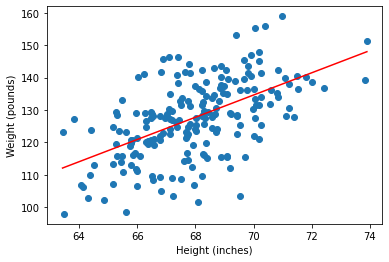

R-Squared = 0.3100983326548261


In [1]:
# calculating a pearson correlation

import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

# getting the height and weight measurements data from 'https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html'

url = 'https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv'
dataframe = pd.read_csv(url)

print('Head of Height/Weight data:')
print()

print('Rows:', dataframe.shape[0], 'Columns:', dataframe.shape[1])

# remaning the height and weight columns to make them easier to subset

dataframe.columns = ['Index:', 'Height:', 'Weight:']

print()
display(dataframe.head())

# calculating the means of height and weight

x_bar = np.mean(dataframe['Height:'])
y_bar = np.mean(dataframe['Weight:'])

#calculating the sum of the product of the deviations of scores on each variable

x_dev = []
y_dev = []
height = dataframe['Height:']
weight = dataframe['Weight:']

count = 0
for i in range(len(dataframe)):
    x_dev.append(height[count] - x_bar)
    y_dev.append(weight[count] - y_bar)
    count = count + 1

x_dev_y_dev_product = []

count = 0
if len(x_dev) == len(y_dev):
    for i in range(len(x_dev)):
        x_dev_y_dev_product.append(x_dev[count]*y_dev[count])
        count= count + 1
        
sum_product_dev = sum(x_dev_y_dev_product)

# calculating the sum of squares for height and for weight

sq_x = []
sq_y = []

count = 0
if len(x_dev) == len(y_dev):
    for i in range(len(x_dev)):
        sq_x.append(x_dev[count]**2)
        sq_y.append(y_dev[count]**2)
        count = count + 1
        
sum_sq_x = sum(sq_x)
sum_sq_y = sum(sq_y)

# calculating pearson's r, its t statistic and p-value

r = sum_product_dev/np.sqrt(sum_sq_x*sum_sq_y)
n_minus_2 = len(dataframe) - 2
t_of_r = (r*np.sqrt(n_minus_2))/np.sqrt(1-r**2)
p_value = 2 * (1 - scipy.stats.t.cdf(abs(t_of_r), df = n_minus_2 ))

print()
print('Pearson r value obtained by manual calculation:', 'r =', round(r,4))
print('t =', t_of_r)
print('p =', p_value, '\n')

if r >0:
    print('There was a positive correlation between height and weight.')

if r <0:
    print('The was a negative correlation between height and weight.')
    
if r == 0:
    print('There was no correlation between height and weight')
    

# checking the results with scipy.stats.pearsonr
print()
print('Pearson r result obtained from scipy.stats.pearsonr: r =', (scipy.stats.pearsonr(height,weight)[0]), 'p =', scipy.stats.pearsonr(height,weight)[1])

# performing a linear regression on height and weight 

result1 = scipy.stats.linregress(dataframe["Height:"], dataframe["Weight:"])

# creating a scatterplot and regression line for height and weight

plt.scatter(dataframe["Height:"], dataframe["Weight:"])
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")

yhat = dataframe["Height:"]*result1[0]+result1[1]+result1[-1]

plt.plot(np.sort(dataframe["Height:"]), np.sort(yhat), color="red")
plt.show()

# calcualting proportion of the variance explained

r_squared = r**2

print('R-Squared =', r_squared)